<a href="https://colab.research.google.com/github/Flaschix/KompAlg/blob/main/Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, Math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

def add(x, y): return ['+', x, y]
def sub(x, y): return ['-', x, y]
def mul(x, y): return ['*', x, y]
def div(x, y): return ['/', x, y]
def power(x, y): return ['^', x, y]
def negative(x): return ['~', x]
def sin_(x): return ['sin', x]
def cos_(x): return ['cos', x]
def tg_(x): return ['tg', x]
def ctg_(x): return ['ctg', x]
def asin_(x): return ['asin', x]
def acos_(x): return ['acos', x]
def atg_(x): return ['atg', x]
def actg_(x): return ['actg', x]
def sh_(x): return ['sh', x]
def ch_(x): return ['ch', x]
def th_(x): return ['th', x]
def cth_(x): return ['cth', x]
def ash_(x): return ['ash', x]
def ach_(x): return ['ach', x]
def ath_(x): return ['ath', x]
def acth_(x): return ['acth', x]
def sqrt_(x): return ['sqrt', x]
def ln_(x): return ['ln', x]
def lg_(x): return ['lg', x]

def fix(x):
  if isinstance(x, Expression):
    return x
  return Expression(x)

class Expression:
  def __init__(self, x):
    self.T = x
  def __add__(self, x):
    return Expression(add(self.T, fix(x).T))
  def __radd__(self, x):
    return Expression(add(fix(x).T, self.T))
  def __sub__(self, x):
    return Expression(sub(self.T, fix(x).T))
  def __rsub__(self, x):
    return Expression(sub(fix(x).T, self.T))
  def __mul__(self, x):
    return Expression(mul(self.T, fix(x).T))
  def __rmul__(self, x):
    return Expression(mul(fix(x).T, self.T))
  def __truediv__(self, x):
    return Expression(div(self.T, fix(x).T))
  def __rtruediv__(self, x):
    return Expression(div(fix(x).T, self.T))
  def __pow__(self, x):
    return Expression(power(self.T, fix(x).T))
  def __rpow__(self, x):
    return Expression(power(fix(x).T, self.T))
  def __neg__(self):
    return Expression(negative(self.T))  
  
def sin(x):
  return Expression(sin_(fix(x).T))
def cos(x):
  return Expression(cos_(fix(x).T))
def tg(x):
  return Expression(tg_(fix(x).T))
def ctg(x):
  return Expression(ctg_(fix(x).T))
def asin(x):
  return Expression(asin_(fix(x).T))
def acos(x):
  return Expression(acos_(fix(x).T))
def atg(x):
  return Expression(atg_(fix(x).T))
def actg(x):
  return Expression(actg_(fix(x).T))
def sh(x):
  return Expression(sh_(fix(x).T))
def ch(x):
  return Expression(ch_(fix(x).T))
def th(x):
  return Expression(th_(fix(x).T))
def cth(x):
  return Expression(cth_(fix(x).T))
def ash(x):
  return Expression(ash_(fix(x).T))
def ach(x):
  return Expression(ach_(fix(x).T))
def ath(x):
  return Expression(ath_(fix(x).T))
def acth(x):
  return Expression(acth_(fix(x).T))
def sqrt(x):
  return Expression(sqrt_(fix(x).T))
def ln(x):
  return Expression(ln_(fix(x).T))
def lg(x):
  return Expression(lg_(fix(x).T))


def show(x):
  display(Math(latex(x)))

def enclose(x):
  return f'\\left( {x} \\right)'

def latex(x):
  if isinstance(x, Expression):
    return latex(x.T)

  if isinstance(x, (int, str)):
    return str(x)

  op = x[0]
  if op in '+-*/^':
    l, r = latex(x[1]), latex(x[2])
    if op == '+':
      return f'{l} + {r}'
    if op == '-':
      return f'{l} - {r}'
    if op == '*':
      return f'{l} \\cdot {r}'
    if op == '/':
      return f'\\dfrac{{{l}}}{{{r}}}'
    if op == '^':
      if isinstance(x[1], list):
        l = enclose(l)
      return f'{{{l}}}^{{{r}}}'
  else: 
    a = latex(x[1])
    if op == '~':
      return f'- {a}'
    if op == 'sin':
      return f'\\sin {a}'
    if op == 'cos':
      return f'\\cos {a}'
    if op == 'tg':
      return f'\\tan {a}'
    if op == 'ctg':
      return f'\\cot {a}'
    if op == 'asin':
      return f'\\arcsin {a}'
    if op == 'acos':
      return f'\\arccos {a}'
    if op == 'atg':
      return f'\\arctan {a}'
    if op == 'actg':
      return f'\\arccot {a}'
    if op == 'sh':
      return f'\\sinh {a}'
    if op == 'ch':
      return f'\\cosh {a}'
    if op == 'th':
      return f'\\tanh {a}'
    if op == 'cth':
      return f'\\coth {a}'
    if op == 'ash':
      return f'\\arsh {a}'
    if op == 'ach':
      return f'\\arch {a}'
    if op == 'ath':
      return f'\\arth {a}'
    if op == 'acth':
      return f'\\arcth {a}'
    if op == 'sqrt':
      return f'\\sqrt{{{a}}}'
    if op == 'ln':
      return f'\\ln{{{a}}}'
    if op == 'lg':
      return f'\\lg{{{a}}}'


def symbols(s):
  S = s.split()
  if len(S) == 1:
    return Expression(s)
  return (Expression(i) for i in S)


def evalf(x, arg = {}):
  if isinstance(x, Expression):
    if isinstance(arg, dict):
      arg = {i.T: arg[i] for i in arg}
    else:
      arg = {'$': arg}
    return evalf(x.T, arg)

  if isinstance(x, int):
    return x

  if isinstance(x, str):
    if x in arg:
      return arg[x]
    return arg['$']

  op = x[0]
  if op in '+-*/^':
    l, r = evalf(x[1], arg), evalf(x[2], arg)
    if op == '+':
      return l + r
    if op == '-':
      return l - r
    if op == '*':
      return l * r
    if op == '/':
      return l / r
    if op == '^':
      return l ** r
  else:
    a = evalf(x[1], arg)
    if op == '~':
      return - a
    if op == 'sin':
      return np.sin(a)
    if op == 'cos':
      return np.cos(a)
    if op == 'tg':
      return np.tan(a)
    if op == 'ctg':
      return 1/np.tan(a)
    if op == 'asin':
      return np.arcsin(a)
    if op == 'acos':
      return np.arccos(a)
    if op == 'atg':
      return np.arctan(a)
    if op == 'actg':
      return 1/np.arctan(a)
    if op == 'sh':
      return np.sinh(a)
    if op == 'ch':
      return np.cosh(a)
    if op == 'th':
      return np.tanh(a)
    if op == 'cth':
      return 1/np.tanh(a)
    if op == 'ash':
      return np.arcsinh(a)
    if op == 'ach':
      return np.arccosh(a)
    if op == 'ath':
      return np.arctanh(a)
    if op == 'acth':
      return 1/np.arctanh(a)
    if op == 'sqrt':
      return np.sqrt(a)
    if op == 'ln':
      return np.ln(a)
    if op == 'lg':
      return np.lg(a)
  return None

def plot(F, G, t, t1, t2): 
  T = np.linspace(t1, t2, 1000) 
  X = evalf(F, {t: T}) 
  Y = evalf(G, {t: T}) 
  plt.plot(X, Y)

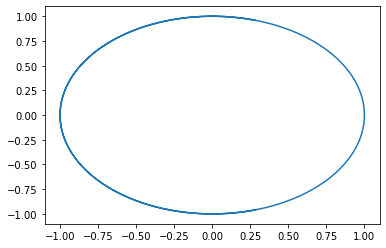

In [8]:
x = Expression('x') 
y = cos(x)
z = sin(x)
plot(y, z, x, -5, 5)
